# Gaussian Process Regression

# //TODO LIST
## Data import
## Data cleaning
### duplicate remover
### 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import

In [7]:
url = 'https://raw.githubusercontent.com/LeoPeink/GPRegression/refs/heads/master/sale_clean.csv'
df = pd.read_csv(url, index_col=0) #read csv from gitHub
df.reset_index(inplace=True)       #reset index to default

#Warning about columns 10 and 11. They are useless for regression, so will be removed anyway from the dataset later.
#df.head(5)

C:\Users\Leo\AppData\Local\Temp\ipykernel_11164\2676104874.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, index_col=0) #read csv from gitHub


## Data Cleaning
The dataset contains a lot of duplicate rows. After careful consideration and seeing that the original dataset was scraped on immobiliare.it, I concluded that it was probably a scraping error.
In the unlikely case the duplicate rows were actual different houses with the same exact carachteristics, the adapted policy was to remove them to avoid eccessively reducing the dataset variance.

Also, the amount of features is way overkill for what we need in our didactic demo. All features except prezzo, stanze, bagni and superficie will be removed.

Finally, due to the scope of the project (house price regression), all records with missing price were also dropped.

In [8]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Drop columns: 'regione', 'citta' and 27 other columns
    df = df.drop(columns=['regione', 'citta', 'quartiere', 'datetime', 'posti auto', 'bagni per stanza', 'ultimo piano', 'stato', 'classe energetica', 'vista mare', 'riscaldamento centralizzato', 'arredato', 'balcone', 'impianto tv', 'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina', 'giardino comune', 'giardino privato', 'impianto allarme', 'portiere', 'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico', 'loft', 'mansarda'])
    # Drop rows with missing data in column: 'prezzo'
    df = df.dropna(subset=['prezzo'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,prezzo,bagni,stanze,superficie
0,78000.0,1.0,3.0,67.0
1,460000.0,2.0,3.0,75.0
2,387000.0,2.0,4.0,160.0
3,257000.0,2.0,5.0,136.0
4,370000.0,2.0,3.0,105.0


# Exploratory analysis
The single features are analized using the following framework:

## Pricing hell
The price feature has HORRIBLE values.
The majority of houses are almost for free and some houses cost more euros than the amount of sand grains on earth (10^20). The IQR strategy does not work for the low outliers here, so I decidet to do 0.05 trimming:

Raw price distribution:
count    2.647100e+04
mean     4.036561e+31
std      2.224227e+33
min      1.000000e+00
25%      2.000000e+03
50%      2.100000e+05
75%      4.250000e+05
max      1.950000e+35
Name: prezzo, dtype: float64


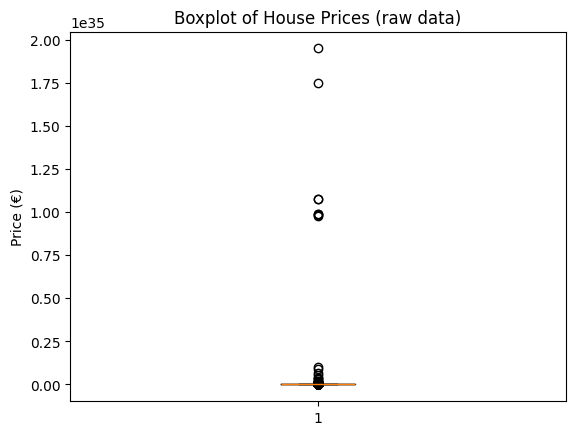

In [9]:
#boxplot with distribution of every feature
print('Raw price distribution:')
print(df_clean['prezzo'].describe())
plt.boxplot(df_clean['prezzo'])
plt.title('Boxplot of House Prices (raw data)')
plt.ylabel('Price (€)')
plt.show()


5% quantile: 550.0
95% quantile: 22200000.0
count    2.280400e+04
mean     4.087934e+05
std      1.064271e+06
min      5.500000e+02
25%      7.800000e+04
50%      2.200000e+05
75%      3.990000e+05
max      2.190000e+07
Name: prezzo, dtype: float64


,prezzo,bagni,stanze,superficie
0,78000.0,1.0,3.0,67.0
1,460000.0,2.0,3.0,75.0
2,387000.0,2.0,4.0,160.0
3,257000.0,2.0,5.0,136.0
4,370000.0,2.0,3.0,105.0


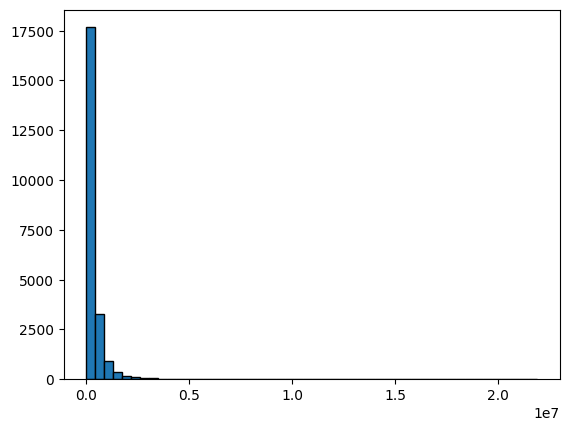

In [10]:
#remove outliers from prezzo using 5% and 95% quantiles
q_low = df_clean['prezzo'].quantile(0.1)
print (f"5% quantile: {q_low}")
q_high = df_clean['prezzo'].quantile(0.95)
print (f"95% quantile: {q_high}")
df_clean = df_clean[(df_clean['prezzo'] >= q_low) & (df_clean['prezzo'] <= q_high)]
#plot histogram of 'prezzo'
plt.hist(df_clean['prezzo'], bins=50, edgecolor='black')

print(df_clean['prezzo'].describe())
df_clean.head()

The next step in preprocessing was to apply a log scale to "Prezzo", to keep as much data as possible in the dataset for the regression. the result is a bimodal distribution.

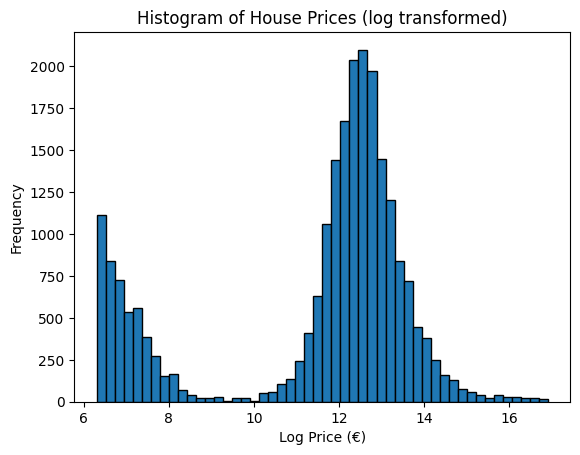

In [11]:
df_clean['prezzo'] = np.log(df_clean['prezzo'])  #apply log transformation to 'prezzo'
#plot histogram of 'prezzo' after log transformation
plt.hist(df_clean['prezzo'], bins=50, edgecolor='black')
plt.title('Histogram of House Prices (log transformed)')
plt.xlabel('Log Price (€)')
plt.ylabel('Frequency')
plt.show()